### Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset to get an overview

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Define the cutoff for good wine quality (e.g., 7 or higher)
cutoff = 7

# Create a new binary column 'is_good' where 1 indicates good wine (quality >= cutoff) and 0 indicates not good wine (quality < cutoff)
df['is_good'] = df['quality'].apply(lambda x: 1 if x >= cutoff else 0)

# Drop the original 'quality' column since we have already converted it to binary classes
df.drop('quality', axis=1, inplace=True)

# Display the updated DataFrame
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [6]:
# Separate the features (inputs) and the target variable (output)
X = df.drop('is_good', axis=1)  # Features
y = df['is_good']  # Target variable

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1599, 11)
Shape of y: (1599,)


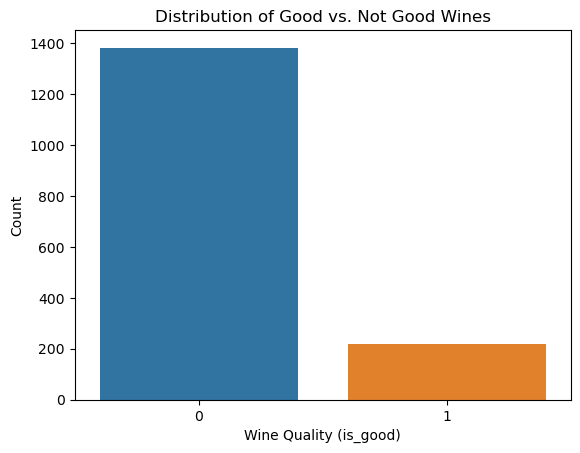

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of good vs. not good wines
sns.countplot(x='is_good', data=df)
plt.title("Distribution of Good vs. Not Good Wines")
plt.xlabel("Wine Quality (is_good)")
plt.ylabel("Count")
plt.show()


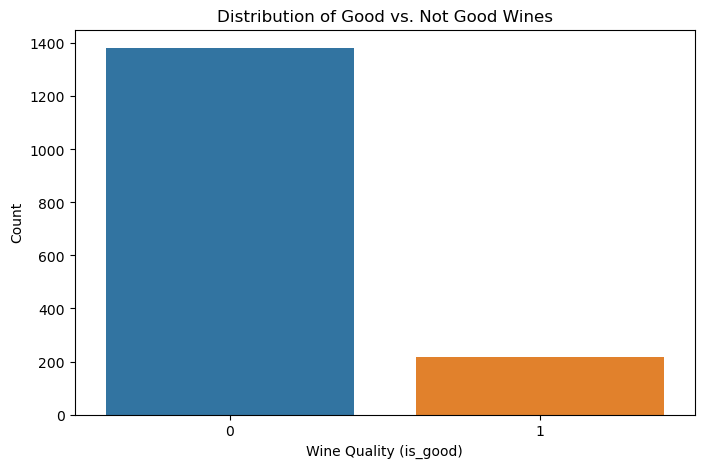

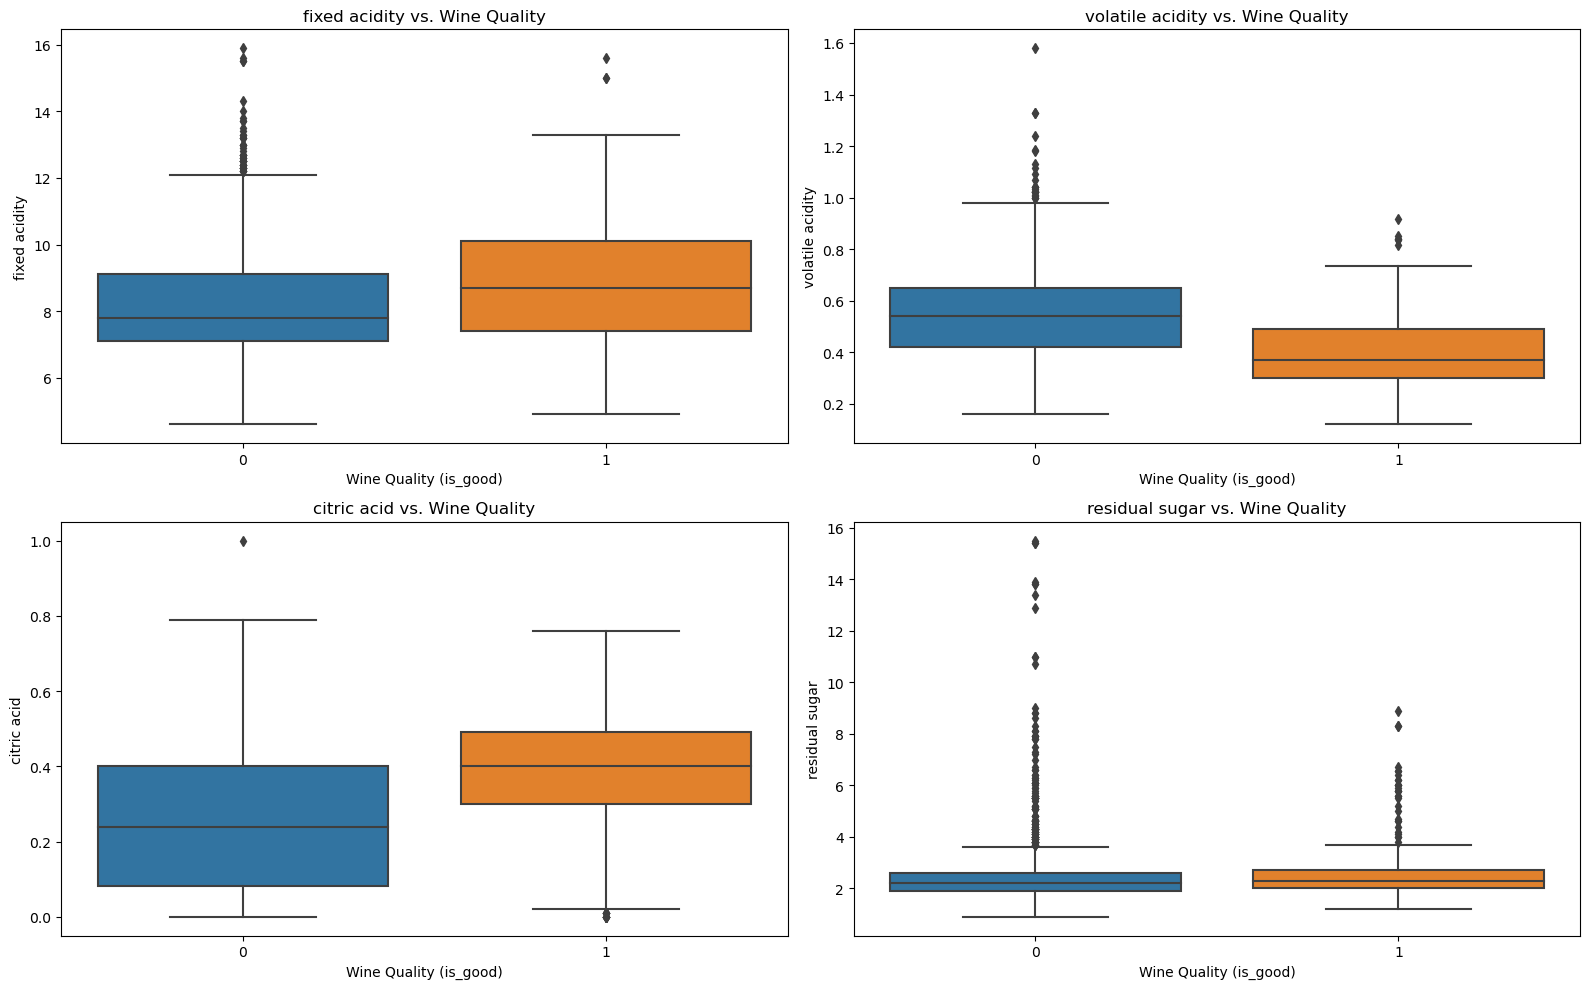

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of good vs. not good wines
plt.figure(figsize=(8, 5))
sns.countplot(x='is_good', data=df)
plt.title("Distribution of Good vs. Not Good Wines")
plt.xlabel("Wine Quality (is_good)")
plt.ylabel("Count")
plt.show()

# Visualize the relationship between each input variable and the target variable in a grid of two rows and two plots each
num_features = len(X.columns)
rows = 2
cols = min(2, num_features)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

for i, feature in enumerate(X.columns):
    if i < 4:  # Limit the number of plots to 4 to fit the grid
        sns.boxplot(x='is_good', y=feature, data=df, ax=axes[i])
        axes[i].set_title(f"{feature} vs. Wine Quality")
        axes[i].set_xlabel("Wine Quality (is_good)")
        axes[i].set_ylabel(feature)

# Remove any empty subplots if the number of features is not enough to fill the entire grid
for j in range(num_features, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the Area Under the ROC Curve (ROC AUC)
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)


Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

Confusion Matrix:
[[264   9]
 [ 23  24]]
ROC AUC: 0.9426778894864001
